# Assignment 5

Name 1: <br/>
Student id 1: <br/>
Email 1: <br/>


Name 2: <br/>
Student id 2: <br/>
Email 2: <br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective Python files for exercises 1 and 2. There is no need to submit the data files. <br/>
Upload the zipped folder in Teams. Make sure to click on "Turn-in" after your upload your submission, otherwise the assignment will not be considered as submitted. Only one from the group should make the submisssion.

---


## Exercise 1: Out Of Vocabulary Words (3.5 points)

As you saw in the lecture, the higher the number of unseen tokens in your language corpus, the higher the OOV rate. In this exercise, you will calculate the OOV rate for different languages for different vocabulary sizes. For each corpus, preprocess the data by lowercasing the text and applying tokenisation. Since there isn't any standard tokeniser that will work on all the languages, we recommend that you write your own function called `preprocess` in `exercise_1.py`.

### 1.1 Preprocess data (0.5 points)

Preprocess the data and partition it in a 70-30% train-test split. For this, write your own function `train_test_split_data` in `exercise_1.py`. You may modify the function signature and the code in the cell below appropriately.

In [21]:
from importlib import reload
import os
import exercise_1
exercise_1 = reload(exercise_1)

# Walk through the data directory and read all the corpora
# For each corpus, read the text, preprocess it and create the train test split for each language

corpora = {} # To save the respective corpora

# TODO: Add a loop over each file
for filename in os.listdir('data/'):
    with open(os.path.join('data/', filename)) as f:
        text = f.read()
        pp = exercise_1.preprocess(text) #TODO: preprocess text
        train, test = exercise_1.train_test_split_data(pp, test_size=0.3) #TODO: split data
        #TODO: Add respective splits to the corpora dict
        lang = filename.split('.')[1]
        corpora[lang] = (train, test)

### 1.2 Calculate OOV rates (1.5 points)
For every language, construct a vocabulary by taking the 15000 most frequent tokens in the training set. Compute the OOV rate for vocabulary sizes 1k, 2k, ..., 15k. Implement this in the function `get_oov_rates` in `exercise_1.py`. 

In [10]:
oov_rates = {}
for lang, (train, test) in corpora.items():
    oov_rates[lang] = exercise_1.get_oov_rates(train, test)

### 1.3 Plotting OOV rates (1 point) 
* Using the loglog scale, plot the OOV rate against the vocabulary size for all the languages in a single plot. Make sure your legend identifies the languages appropriately and you label the axes.

* Describe your observations in 3-4 sentences.

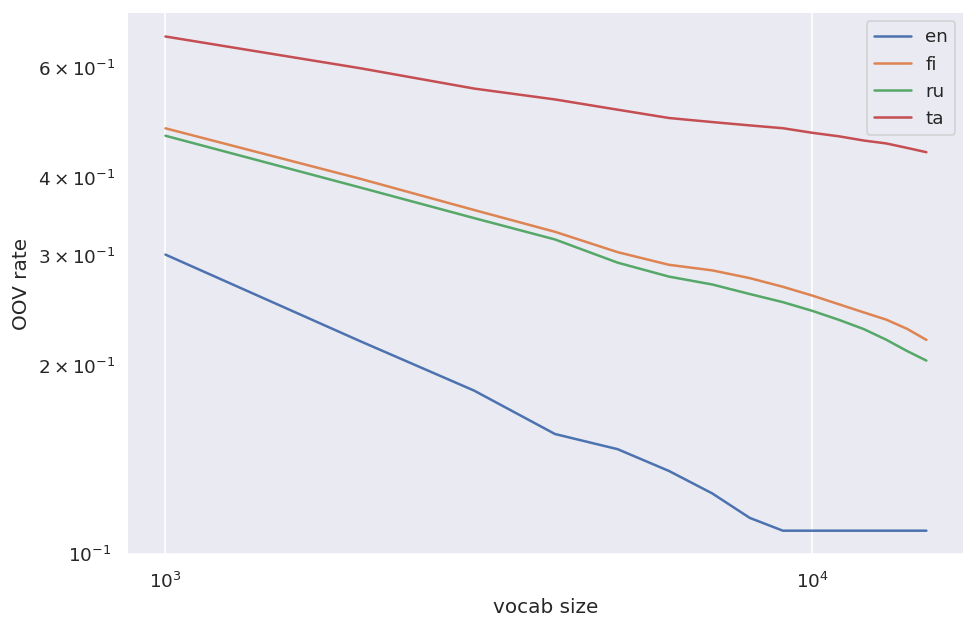

In [11]:
exercise_1.plot_oov_rates(oov_rates)

### 1.4 Handling OOV words (0.5 points)
* Before applying smoothing and backing-off models, we need to take care of the OOV words. Suggest 2 techniques to handle Out-Of-Vocabulary words your corpus.
* What are the advantages and disadvantages of each?

## Exercise 2: Smoothing (4 points)
 
### 2.1 Additive smoothing (1 point)

In the last assignments we largely ignored the issue of unseen words, i. s. words that are not in the train set/observed data but part of the test set. A very simple method to account for unseen words is [additive smoothing](https://en.wikipedia.org/wiki/Additive_smoothing). It assigns a small 'pseudo-count' to all unseen words AND to the words already in the language model, and then uses the updated counts to estimate the n-gram probabilities. The formula for unigram probabilities is:
\begin{equation}
p(w_i) = \frac{C(w_i) + \alpha}{N + \alpha |V|}
\end{equation}

Where
* $C(w_i)$ is the empirical count of the unigram $w_i$
* $N$ is the number of unigrams in the train set
* $|V|$ is the size of the vocabulary after smoothing
* $\alpha$ is the additive count.

If $\alpha = 1$ this is known as *Laplace* smoothing, if $0 < \alpha < 1$ *Lidstone* smoothing.

1. How would you estimate the bigram probability $p(w_i|w_{i-1})$ and the general case $p(w_i|w_{i-1}, ..., w_{n-i+1})$? Explain each part of the formula. (0.5 points)
2. Is it a good idea to set $\alpha$ to 1? What could be a more reasonable value, and why? (0.5 points)

### 2.2 Language model class (3 points)

Until now, you have implemented language models as a series of Python functions. We have provided to you a class skeleton in `lm.py` that should do all the tricks you need to estimate a language model. You will use the same corpora and train/test split as in Exercise 1.

1. Complete the implementation of the `LanguageModel` class. You may estimate the parameters of the language model as you like, but the method `perplexity` should perform the perplexity calculation (as in the below code block), and the method `lidstone_smoothing` should smooth the data. You may define new methods or change the signatures of existing ones, as long as you comment on your changes. Make sure that the relative frequencies and the conditional probabilities for each history sum up to 1. (1.5 points)

2. Choose $\alpha = 1$. Then, estimate $N = 1,2,3$ language models for the corpora from Exercise 1, and plot perplexity vs. $n$ for each of them. Do so by implementing the function `plot_pp` in `exercise_2.py` Do you observe any differences between the languages? Explain what you see in 3-4 sentences. (1 point)


{'en': [1336.2086003678535, 34.22631563665897, 2.4072874788041747], 'fi': [5471.430058648851, 9.814146452299644, 1.6003151862281308], 'ru': [4523.868533239259, 15.392654713628222, 1.522054436427925], 'ta': [17496.799338480825, 6.466728053152381, 1.1626254619024203]}


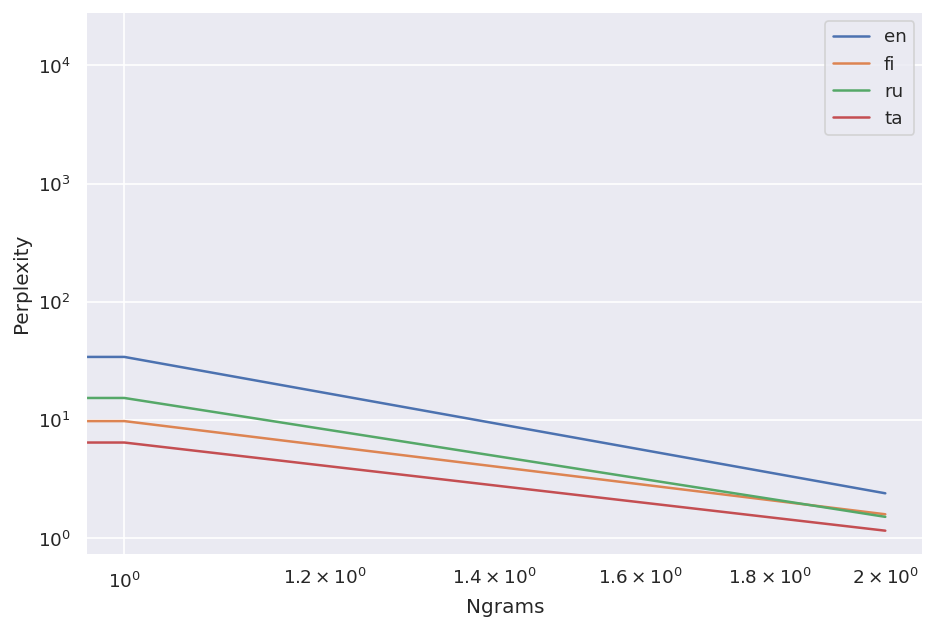

In [33]:

from importlib import reload
import lm
import exercise_2
lm = reload(lm)
exercise_2 = reload(exercise_2)

N = 3
PPs = {}
for lang, (train, test) in corpora.items():
    pp_list = []
    for i in range(1,N+1):
        LM = lm.LanguageModel(train, test, N=i, alpha=1)
        pp_list.append(LM.perplexity())
    PPs[lang] = pp_list

print(PPs)
exercise_2.plot_pp(PPs)

3. Now, find a good value for $\alpha$ for the *English* corpus. Do so by estimating $K=100$ trigram language models with $\alpha = 0.0, 0.01,...,0.99,1.0$, and plot trigram perplexity vs. increasing $\alpha$. You can write the code for the loop in the code cell below, the plotting code should be in `plot_pp_vs_alpha` in `exercise_2.py`. Does the $\alpha$ coincide with your estimate in 2.1.2? (0.5 points)

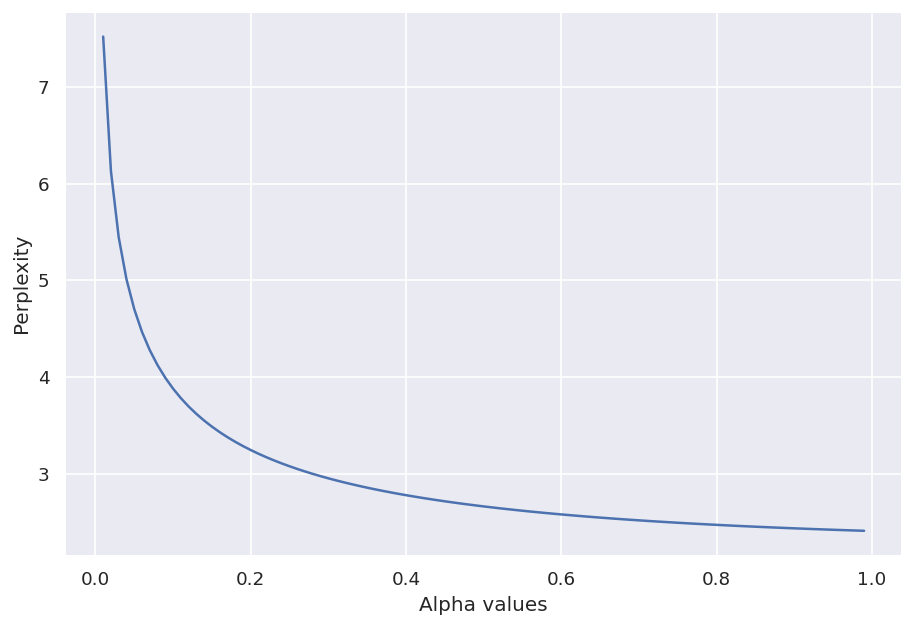

In [30]:
import numpy as np

# lang = "corpus.en"
lang = "en"

N = 3
K = 100

PPs = []
alphas = np.arange(0.0,1.0,0.01)
train, test = corpora[lang]
# TODO: Loop
for alpha in alphas:
    LM = lm.LanguageModel(train, test, N=N, alpha=alpha)
    pp = LM.perplexity()
    PPs.append(pp)

exercise_2.plot_pp_vs_alpha(PPs, alphas)

## Exercise 3: Misc. (2.5 points)

## 3.1 Smoothed perplexity (1 point)

Assume you trained (MLE) an n-gram language model on datasets $D_\text{train}$ and $D_\text{test}$. You measure perplexities $p_{1,\text{train}}$ and $p_{1,\text{test}}$ respectively. You then smooth your n-gram language model and evaluate again on the two datasets, resulting in $p_{2,\text{train}}$ and $p_{2,\text{test}}$. Answer the following question with brief comments (e.g. _"X is always greater than Y because .."_). For a language model $p$, test perplexity can, for example, be computed as $2^{\frac{-1}{|D_\text{test}|} \sum_{w \in D_\text{test}}\log p(w|h)}$ and train perplexity as $2^{\frac{-1}{|D_\text{train}|} \sum_{w \in D_\text{train}}\log p(w|h)}$.

1. What is the relation of $p_{1,\text{train}}$ and $p_{1,\text{test}}$?
2. What is the relation of $p_{2,\text{train}}$ and $p_{2,\text{test}}$?
3. What is the relation of $p_{1,\text{train}}$ and $p_{2,\text{train}}$?
4. What is the relation of $p_{1,\text{test}}$ and $p_{2,\text{test}}$?
5. How does $n$ size affect the perplexities?

**Answers** <br>

1. $p_{1,\text{train}}$ is less than $p_{1,\text{test}}$ because when training a language model (LM) on train data, the model has obviosly come across each word of vocabulary on the train set. Hence, computing perplexity on train data would always result in lower perplexity then test data as there might be some words in test set which the LM is seeing for the first time resulting in poorer perplexity.

2. $p_{2,\text{train}}$ and $p_{2,\text{test}}$

3. $p_{1,\text{train}}$ and $p_{2,\text{train}}$ would remain same as we do smoothing only on test set to cover up the occurances of unknown words. Hence, perplexity for the train set would remain same before and after smoothing.

4. $p_{1,\text{test}}$ will be greater than $p_{2,\text{test}}$ because after smoothing, some probability mass from the higher counts is assigned to the zero counts (i.e. the words which only occur in test set). This makes the distribution a little less discontinuous. Hence, smoothing causes improvement in perplexity and therefore becomes less than what it was before smoothing. 

5. As $n$ (I assume we are talking about n-gram size, should have been specified explicitly) increases, perplexity decreases. A trigram LM would give better perplexity than a unigram LM. This is because computing probability of the	next word will turn out to be closely related to computing the probability of a	sequence of	words. So longer the sequence, more would be the conditional probablity $p(w|h)$


## 3.2 Infinite smoothing (0.5 points)

What distribution would you get if you applied additive or absolute discounting (choose one) smoothing infinitely? e.g. if $F_\text{smooth}$ is a function that smooths a language model (either additive or absolute discounting) and $\text{lm}^{(n+1)} = F_\text{smooth}(\text{lm}^{(n)})$. What will the language model $\lim_{n\rightarrow \infty} \text{lm}^{(n)}$ look similar to?

**Answers** <br>
For $n \rightarrow \infty$, the LM distribution would become uniform.

## 3.3 Convex combination of LM models (1 point)

Consider the following quantity based on two independent language models $p_1$ and $p_2$.

$f_3(w|h) = \beta_1\cdot p_1(w|h) + \beta_2\cdot p_2(w|h)$ where $\beta_1 + \beta_2 = 1$ and $\beta_1 \ge 0, \beta_2 \ge 0$

- Is it still a language model (probability distribution given history $h$)? Show that all properties hold or find a counterexample for each: (1) non-negativity, (2) summation to 1 and (3) $\sigma$-additivity. See [Wikipedia - Probability Axioms](https://en.wikipedia.org/wiki/Probability_axioms). (0.5 points)
- What would be the possible gain of using the given function as a language model? (0.5 points)

**Answers** <br>
1. *non-negativity* <br>
Already given that $\beta_1 \ge 0, \beta_2 \ge 0$. Also, the probablity terms $p_1(w|h)$ and $p_2(w|h)$ would always be a non-negative quantity. So $f_3$ as a whole would be always non-negative.

2. *summation to 1* <br>
Given two independent LMs $p_1$ and $p_2$.
$$\sum_{i} p_1(w_i|h_i) = 1$$
and 
$$\sum_{i} p_2(w_i|h_i) = 1$$
Therefore,
$$\sum_{i} f_3(w_i|h_i) = \beta_1\cdot \sum_{i} p_1(w_i|h_i) + \beta_2\cdot \sum_{i} p_2(w_i|h_i)$$
$$\sum_{i} f_3(w_i|h_i) = \beta_1\cdot 1 + \beta_2\cdot 1$$
$$\sum_{i} f_3(w_i|h_i)) = 1$$

3. *$\sigma$-additivity*



One possible gain would be that the given quantity $f_3$ incorporates properties from both the languge models. There are slim chances that for a sequences both $p_1$ and $p_2$ give a poor prediction. Also, the distribution of each of these language models are being controlled by $\beta_1$ and $\beta_2$ which means that a favourable distribution would be given higher importance by controlling $\beta$ factor accordingly.

## Bonus (1 point)

Read about the following special language models techniques. The provided links shold only serve as a starting point.



#### 1. [Neural language models](https://en.wikipedia.org/wiki/Language_model#Neural_network) (0.5 points)

- Describe (~5 sentences or bullet points) the working, advantages and disadvantages of NLM.

#### 2. [Class-based language models](https://www.cs.cmu.edu/~roni/11761/PreviousYearsHandouts/classlm.pdf) (0.5 points)

- What is a class-based language model?
- What issues does it address?
- Can we utilize the output for something more than just language modelling (think about other NLP problems and classes you took)?

<!-- #### 2. [Decoding](https://machinelearningmastery.com/beam-search-decoder-natural-language-processing/) (0.5p)

- What issues does beam search in the context of text generation using language models solve? -->
 <!-- and . Be specific and practical in your answers and support your arguments with evidence.  -->